In [1]:
from conv import Conv2D
import torch 
from PIL import Image
from torchvision.transforms import ToTensor
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
image1 = Image.open('testImage1.jpg')
image1 = ToTensor()(image1).unsqueeze(0)
image1=Variable(image1)
image1 = image1[0]

In [3]:
image2 = Image.open('testImage2.jpg')
image2 = ToTensor()(image2).unsqueeze(0)
image2=Variable(image2)
image2 = image2[0]

In [4]:
def saveImage(imageTensor, imageNum, taskNum, kernalNum):
    output_image = imageTensor.numpy()
    output_img_norm=(((output_image[kernalNum,:,:] - output_image[kernalNum,:,:].min()) / output_image[kernalNum,:,:].max()-output_image[kernalNum,:,:].min()) * 255.0).astype(np.uint8)
    output_img_gray = Image.fromarray(output_img_norm)
    image_name = 'out_%s_task_%s_%s.jpg'%(imageNum,taskNum,kernalNum)
    output_img_gray.save(image_name)


In [5]:
"""
Part A.
Initialize Conv2D in main.py (conv2d = Conv2D(*args)) for one of the task.
Call conv2d.forward() with your input image [3D FloatTensor]. The forward() function must return output [int, 3D FloatTensor].
Save each channel of output tensor separately as a grayscale image in your main repository.
Repeat 2-4 for all the three tasks.
"""

'\nPart A.\nInitialize Conv2D in main.py (conv2d = Conv2D(*args)) for one of the task.\nCall conv2d.forward() with your input image [3D FloatTensor]. The forward() function must return output [int, 3D FloatTensor].\nSave each channel of output tensor separately as a grayscale image in your main repository.\nRepeat 2-4 for all the three tasks.\n'

In [6]:
#task 1
start = time.time()
conv2d = Conv2D(in_channel=3, o_channel=1, kernel_size=3, stride=1, mode='known')
Number_of_ops, output_image = conv2d.forward(image1)
end = time.time()
print(Number_of_ops)
print(start-end)
print(output_image.size())
saveImage(output_image, 1, 1, 0)

here!!
15642720
-68.02485918998718
torch.Size([1, 720, 1280])


In [34]:
#task 2
start = time.time()
conv2d = Conv2D(in_channel=3, o_channel=2, kernel_size=5, stride=1, mode='known')
Number_of_ops, output_image = conv2d.forward(image1)
end = time.time()
print(start-end)
print(Number_of_ops)
print(output_image.size())
for i in range(2):
    saveImage(imageTensor=output_image, imageNum=1, taskNum=2, kernalNum=i)


here!!
-313.0046410560608
90034560
torch.Size([2, 720, 1280])


In [35]:
#task 3
start = time.time()
conv2d = Conv2D(in_channel=3, o_channel=3, kernel_size=3, stride=2, mode='known')
Number_of_ops, output_image = conv2d.forward(image1)
end = time.time()
print(start-end)
print(Number_of_ops)
print(output_image.size())
for i in range(3):
    saveImage(imageTensor=output_image, imageNum=1, taskNum=3, kernalNum=i)

here!!
-49.48606514930725
11732040
torch.Size([3, 720, 1280])


In [15]:
'''
Part B
Initialize Conv2D using values of Task 1 and set o_channel to 2^i (i = 0, 1, …, 10) and mode=’rand’.
Plot the time taken for performing each forward() pass as a function of i.
'''

'\nPart B\nInitialize Conv2D using values of Task 1 and set o_channel to 2^i (i = 0, 1, …, 10) and mode=’rand’.\nPlot the time taken for performing each forward() pass as a function of i.\n'

In [ ]:
import time
import matplotlib.pyplot as plt

timeList = []
iList = []
for i in range(0,11):
    start = time.time()
    conv2d = Conv2D(in_channel=3, o_channel=2**i, kernel_size=3, stride=1, mode='rand')
    Number_of_ops, output_image = conv2d.forward(image1)
    end = time.time()
    print(i)
    print(Number_of_ops)
    print(output_image.size())
    print(end-start)
    timeList.append(end-start)
    iList.append(i)


0
15642720
torch.Size([1, 720, 1280])
100.03616261482239
1
31285440
torch.Size([2, 720, 1280])
188.1588740348816
2
62570880
torch.Size([4, 720, 1280])
371.49974513053894
3
125141760
torch.Size([8, 720, 1280])
754.2547178268433
4
250283520
torch.Size([16, 720, 1280])
1487.7864651679993


In [ ]:
import time
import matplotlib.pyplot as plt

timeList = []
iList = []
i = 5
start = time.time()
conv2d = Conv2D(in_channel=3, o_channel=2**i, kernel_size=3, stride=1, mode='rand')
Number_of_ops, output_image = conv2d.forward(image1)
end = time.time()
print(i)
print(Number_of_ops)
print(output_image.size())
print(end-start)
timeList.append(end-start)
iList.append(i)


here!!


In [ ]:
plt.plot(iList, timeList, 'ro')
plt.axis([0, 12, 0, timeList[-1]])
plt.show()

In [ ]:
"""
Part C
Initialize Conv2D using values of Task 2 with kernel_size=3, 5, …, 11 and mode=’rand’.
Plot number of operations (int returned by forward()) used to perform convolution as a function of kernel_size.
"""

here!!
3
31285440
torch.Size([2, 720, 1280])
here!!
5
90034560
torch.Size([2, 720, 1280])
here!!
7
177952320
torch.Size([2, 720, 1280])
here!!
9
294900480
torch.Size([2, 720, 1280])
here!!
11
440740800
torch.Size([2, 720, 1280])


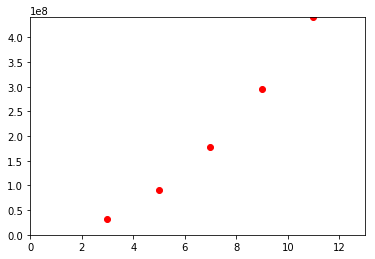

In [10]:
operationList = []
ksList = []
for ks in range(3,13,2):
    conv2d = Conv2D(in_channel=3, o_channel=2, kernel_size=ks, stride=1, mode='rand')
    Number_of_ops, output_image = conv2d.forward(image1)
    print(ks)
    print(Number_of_ops)
    print(output_image.size())
    operationList.append(Number_of_ops)
    ksList.append(ks)
plt.plot(ksList, operationList, 'ro')
plt.axis([0, 13, 0, operationList[-1]])
plt.show()